<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Цели исследования:** Подготовка модели машинного обучения, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды.

**Описание данных:** Датасет с сырыми данными по технологическому процессу получения золота из руды.

## Подготовка данных

**1.1 Импортируем необходимые библиотеки, считаем данные из csv-файлов в датафреймы, сохраним в переменные и выведем их и основную информацию о них на экран**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv', index_col='date')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv', index_col='date')
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv', index_col='date')

In [3]:
data_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [5]:
data_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [7]:
data_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

**1.2 Проверка расчета эффективности обогащения**

In [9]:
# Рассчитаем эффективность обогащения чернового концентрата:

data_train['rougher.output.recovery.check'] = ((data_train['rougher.output.concentrate_au'] * \
                                               (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])) / \
                                               (data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] - \
                                                                         data_train['rougher.output.tail_au']))) * 100

In [10]:
# Определим среднюю абсолютную ошибку между фактическим значением данных
# и расчетным и выведем ее на экран:

print("MAE: ", round(mean_absolute_error(data_train['rougher.output.recovery.check'], data_train['rougher.output.recovery']), 18))

MAE:  9.735e-15


**Вывод:** Средняя абсолютная ошибка между фактическим значением данных и расчетным, крайне мала (9,735 x 10 в −15-ой степени). Из этого можно сделать вывод, что эффективность обогащения в данных рассчитана правильно.

**1.3 Рассмотрим признаки, которые отсутствуют в тестовой выборке**

In [11]:
print(data_train.columns.difference(data_test.columns))

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

**Вывод:** В тестовой выборке отсутствуют признаки, относящиеся к финальному концентрату, параметры продукта после первичной очистки, расчетные характеристики флотации и параметры продукта после нее, а также, параметры продукта после вторичной очистки. Их отсутствие можно объяснить тем, что модель должна делать именно прогноз, то есть ей логично получать на вход только признаки на момент начала очистки.

**1.4 Предобработка данных**

In [12]:
# Проверим датасеты на наличие дубликатов:

data_train.duplicated().sum()

0

In [13]:
data_test.duplicated().sum()

0

In [14]:
data_full.duplicated().sum()

0

In [15]:
# Заменим все пропущенные значения в датасетах медианными:

for i in data_train:
    data_train[i] = data_train[i].fillna(data_train[i].median())

In [16]:
for i in data_test:
    data_test[i] = data_test[i].fillna(data_test[i].median())

In [17]:
for i in data_full:
    data_full[i] = data_full[i].fillna(data_full[i].median())

In [18]:
# Создадим вспомогательный датасет data_full_1, в котором оставим только
# целевые признаки:

data_full_1 = data_full[['rougher.output.recovery', 'final.output.recovery']]

In [19]:
# Объеденим тестовую выборку с вспомогательным датасетом, чтобы добавить
# целевые признаки и в нее и выведем на экран:

data_test = data_test.merge(data_full_1, how = 'left', left_on='date', right_on='date')
data_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [20]:
# Удалим из датасетов строки показателя recovery с нулевым значением, чтобы исключить
# вероятность деления ноля на ноль при последующем вычислении sMAPE:

data_train = data_train[(data_train['rougher.output.recovery'] != 0)]
data_train = data_train[(data_train['final.output.recovery'] != 0)]

In [21]:
data_test = data_test[(data_test['rougher.output.recovery'] != 0)]
data_test = data_test[(data_test['final.output.recovery'] != 0)]

In [22]:
data_full = data_full[(data_full['rougher.output.recovery'] != 0)]
data_full = data_full[(data_full['final.output.recovery'] != 0)]

In [23]:
# Удалим из обучающей выборки выбросы показателей концентрации:

data_train = data_train[((data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_au'] + \
                         data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_sol']) != 0)]
data_train = data_train[((data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_au'] + \
                         data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_sol']) != 0)]
data_train = data_train[((data_train['primary_cleaner.output.concentrate_ag'] + data_train['primary_cleaner.output.concentrate_au'] + \
                         data_train['primary_cleaner.output.concentrate_pb'] + data_train['primary_cleaner.output.concentrate_sol']) != 0)]
data_train = data_train[((data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_au'] + \
                         data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol']) != 0)]

In [24]:
# Изменим последовательность столбцов в тестовой выборке, чтобы привести ее в полное
# соответствие с обучающей:

data_test = data_test[['final.output.recovery', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', \
           'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', \
           'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', \
           'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', \
           'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', \
           'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', \
           'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', \
           'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', \
           'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', \
           'rougher.output.recovery', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', \
           'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', \
           'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', \
           'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', \
           'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank2_a_air',
           'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air', \
           'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air', \
           'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air', \
           'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air', \
           'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air', \
           'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_a_air', \
           'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air', \
           'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air', \
           'secondary_cleaner.state.floatbank6_a_level']]

In [25]:
# Удалим из обучающей выборки лишние признаки, чтобы привести ее в полное
# соответствие с тестовой:

data_train = data_train.drop(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag', 'rougher.output.recovery.check',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.tail_ag',
       'rougher.output.tail_au', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'secondary_cleaner.output.tail_ag',
       'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol'], axis=1)

In [26]:
# Выделим из обучающей и тестовой выборок признаки и целевые признаки, как для
# чернового, так и для финального концентрата:

target_train_rougher = data_train['rougher.output.recovery']
features_train_rougher = data_train.drop(['rougher.output.recovery'] , axis=1)

In [27]:
target_train_final = data_train['final.output.recovery']
features_train_final = data_train.drop(['final.output.recovery'] , axis=1)

In [28]:
target_test_rougher = data_test['rougher.output.recovery']
features_test_rougher = data_test.drop(['rougher.output.recovery'] , axis=1)

In [29]:
target_test_final = data_test['final.output.recovery']
features_test_final = data_test.drop(['final.output.recovery'] , axis=1)

**Вывод:** Проведена проверка датасетов на наличие дубликатов. Пропущенные значения заменены медианными. В тестовый датасет добавлены целевые признаки. Удалены строки показателя эффективности с нулевыми значениями и выбросы показателей концентрации в тренировочной выборке: общая потеря данных не превысила 3-х процентов. Также, из тренировочной удалены столбцы, которые отсутствуют в тестовой выборке. Из них выделены признаки и целевые признаки как для чернового, так и для финального концентратов.

**Промежуточные выводы:**

Средняя абсолютная ошибка между фактическим значением данных и значением, предсказанным моделью, крайне мала (9,735 x 10 в −15-ой степени). Из этого можно сделать вывод, что эффективность обогащения в данных рассчитана правильно.

Отсутствие в тестовой выборке ряда признаков можно объяснить тем, что модель должна делать именно прогноз, то есть ей логично получать на вход только признаки на момент начала очистки.

В ходе предобработки данных проведена проверка датасетов на наличие дубликатов. Пропущенные значения заменены медианными. В тестовый датасет добавлены целевые признаки. Удалены строки показателя эффективности с нулевыми значениями и выбросы показателей концентрации в тренировочной выборке. Также, из тренировочной удалены столбцы, которые отсутствуют в тестовой выборке. Из них выделены признаки и целевые признаки как для чернового, так и для финального концентратов.

## Анализ данных

**2.1 Исследование изменения концентрации металлов на различных этапах очистки**

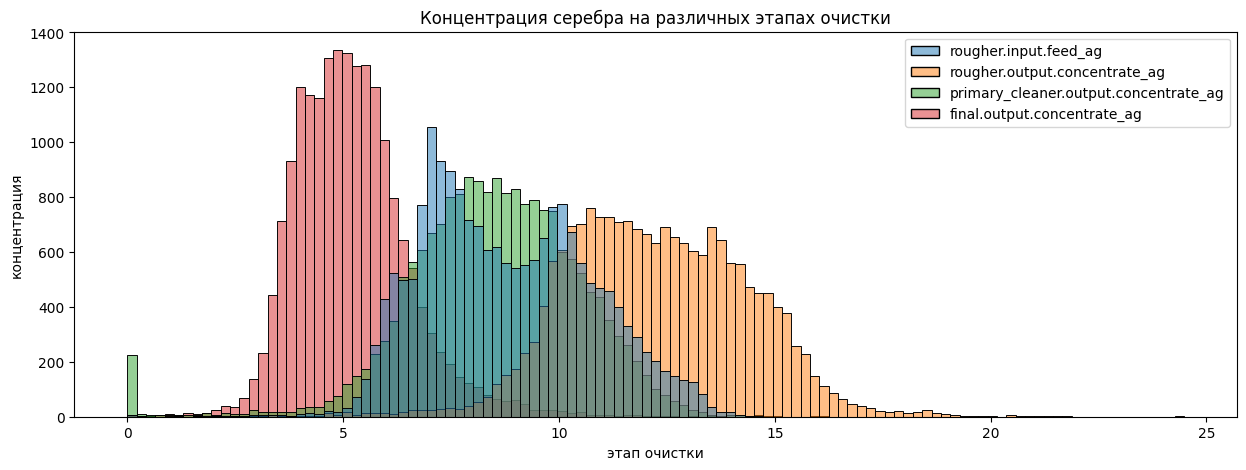

In [30]:
# Создадим гистограммы изменения концентрации металлов на различных этапах очистки:

plt.figure(figsize=(15,5))
sns.histplot(data_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', \
                        'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]). \
                        set(title='Концентрация серебра на различных этапах очистки')

plt.xlabel('этап очистки')
plt.ylabel('концентрация')
plt.show()

**Вывод:** Концентрация серебра возрастает после флотации. Затем немного снижается после первичной очистки. И вновь возрастает после вторичной очистки.

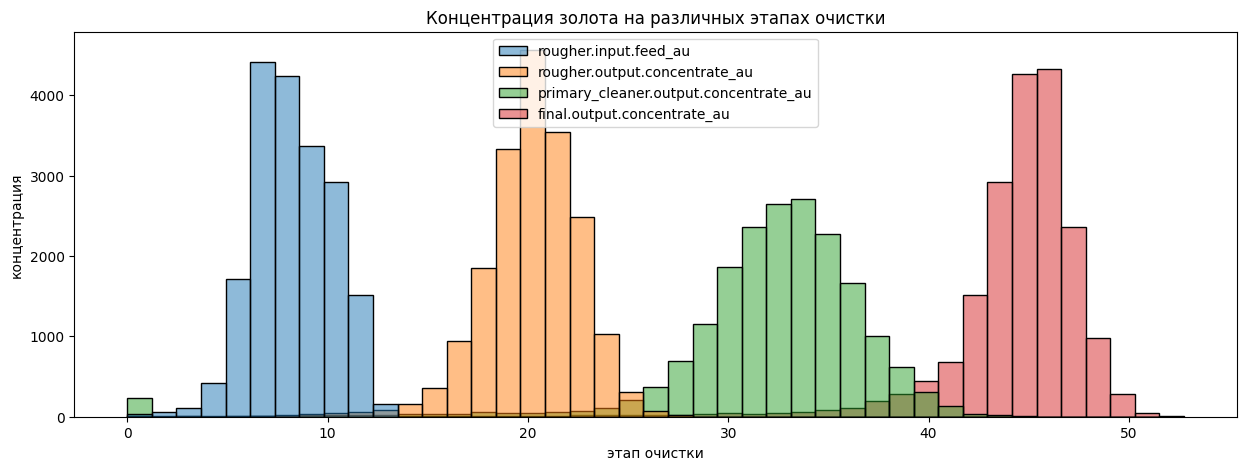

In [31]:
plt.figure(figsize=(15,5))
sns.histplot(data_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', \
                        'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]). \
                        set(title='Концентрация золота на различных этапах очистки')

plt.xlabel('этап очистки')
plt.ylabel('концентрация')
plt.show()

**Вывод:** Концентрация золота заметно увеличивается с каждым следующим этапом очистки.

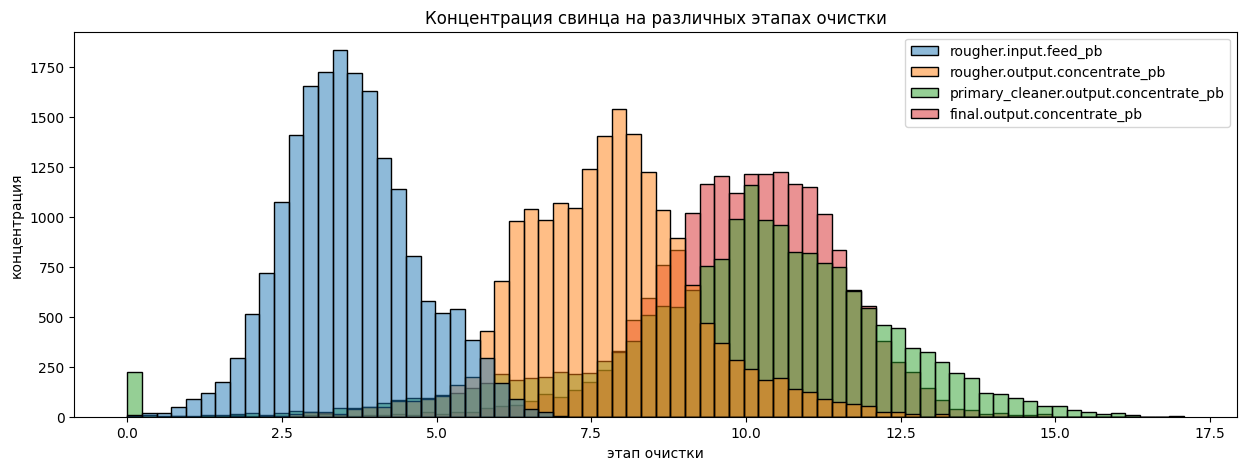

In [32]:
plt.figure(figsize=(15,5))
sns.histplot(data_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', \
                        'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]). \
                        set(title='Концентрация свинца на различных этапах очистки')

plt.xlabel('этап очистки')
plt.ylabel('концентрация')
plt.show()

**Вывод:** Концентрация свинца заметно увеличивается после флотации. И остается приблизительно на одном уровне на последующих этапах очистки.

**2.2 Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках**

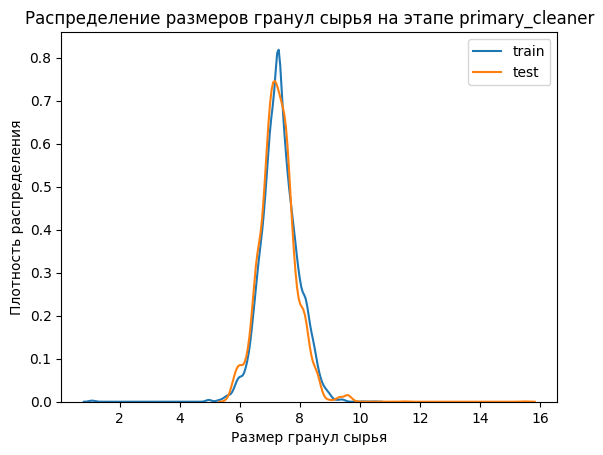

In [33]:
# Построим графики распределения плотности гранул сырья на обучающей и
# тестовой выборках:

sns.kdeplot(data_train['primary_cleaner.input.feed_size'], label='train')
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], label='test')
plt.legend()
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность распределения')
plt.title('Распределение размеров гранул сырья на этапе primary_cleaner');

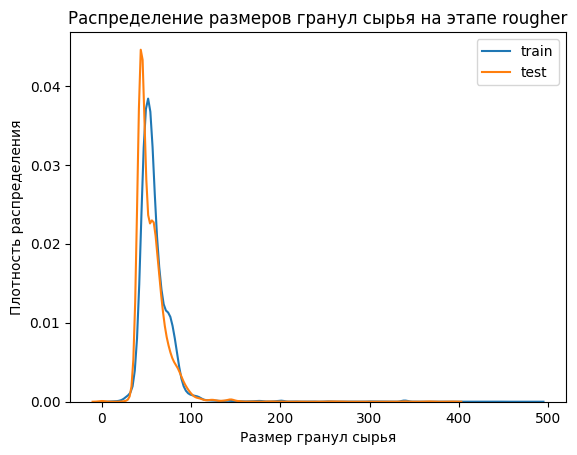

In [34]:
sns.kdeplot(data_train['rougher.input.feed_size'], label='train')
sns.kdeplot(data_test['rougher.input.feed_size'], label='test')
plt.legend()
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность распределения')
plt.title('Распределение размеров гранул сырья на этапе rougher');

**Вывод:** Распределения гранул сырья на обучающей и тестовой выборках выглядят схожим образом. Можно предположить, что оценка модели будет верной.

**2.3 Исследование суммарной концентрации всех веществ на разных стадиях**

In [35]:
# Определим суммарную концентрацию всех веществ на различных этапах очистки:

data_full['rougher.input.feed'] = data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_au'] + \
 data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_sol']

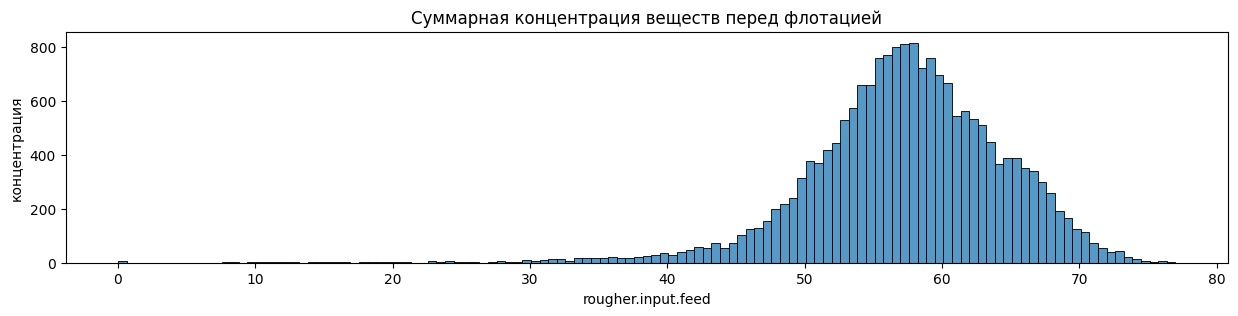

In [36]:
# Создадим гистограммы суммарной концентрации всех веществ на различных этапах очистки:

plt.figure(figsize=(15,3))
sns.histplot(data_full['rougher.input.feed']).set(title='Суммарная концентрация веществ перед флотацией')

plt.xlabel('rougher.input.feed')
plt.ylabel('концентрация')
plt.show()

In [37]:
data_full['rougher.output.concentrate'] = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_au'] + \
 data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_sol']

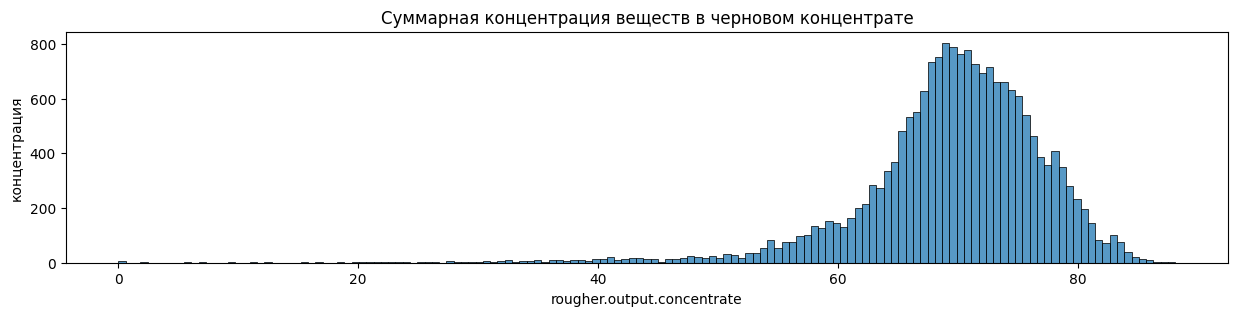

In [38]:
plt.figure(figsize=(15,3))
sns.histplot(data_full['rougher.output.concentrate']).set(title='Суммарная концентрация веществ в черновом концентрате')

plt.xlabel('rougher.output.concentrate')
plt.ylabel('концентрация')
plt.show()

In [39]:
data_full['primary_cleaner.output.concentrate'] = data_full['primary_cleaner.output.concentrate_ag'] + \
 data_full['primary_cleaner.output.concentrate_au'] + data_full['primary_cleaner.output.concentrate_pb'] + \
  data_full['primary_cleaner.output.concentrate_sol']

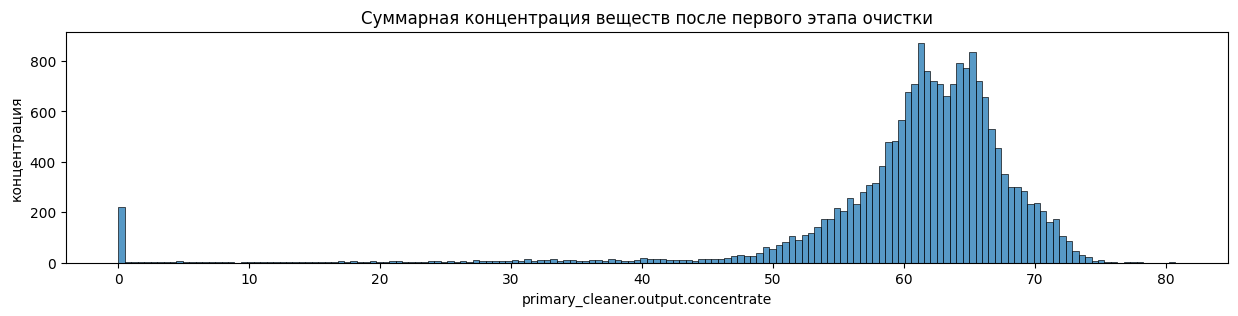

In [40]:
plt.figure(figsize=(15,3))
sns.histplot(data_full['primary_cleaner.output.concentrate']).set(title='Суммарная концентрация веществ после первого этапа очистки')

plt.xlabel('primary_cleaner.output.concentrate')
plt.ylabel('концентрация')
plt.show()

In [41]:
data_full['final.output.concentrate'] = data_full['final.output.concentrate_ag'] + \
 data_full['final.output.concentrate_au'] + data_full['final.output.concentrate_pb'] + \
  data_full['final.output.concentrate_sol']

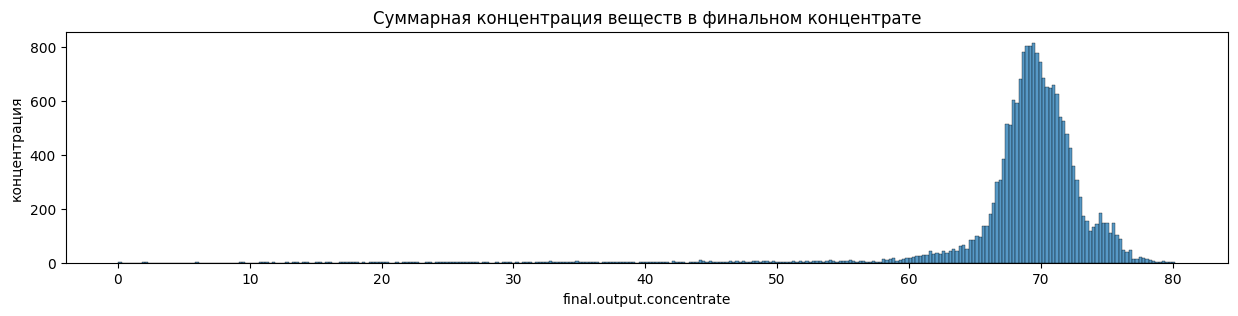

In [42]:
plt.figure(figsize=(15,3))
sns.histplot(data_full['final.output.concentrate']).set(title='Суммарная концентрация веществ в финальном концентрате')

plt.xlabel('final.output.concentrate')
plt.ylabel('концентрация')
plt.show()

**Вывод:** Суммарная концентрация всех веществ постепенно нарастает с каждым следующим этапом очистки. Со значительным приростом на финальной стадии.

**Промежуточные выводы:**

1) Концентрация серебра возрастает после флотации. Затем немного снижается после первичной очистки. И вновь возрастает после вторичной очистки.

Концентрация золота заметно увеличивается с каждым следующим этапом очистки.

Концентрация свинца заметно увеличивается после флотации. И остается приблизительно на одном уровне на последующих этапах очистки.

2) Распределения гранул сырья на обучающей и тестовой выборках выглядят схожим образом. Можно предположить, что оценка модели будет верной.

3) Суммарная концентрация всех веществ постепенно нарастает с каждым следующим этапом очистки. Со значительным приростом на финальной стадии.

## Модель

**3.1 Напишем функцию для вычисления sMAPE**

In [43]:
def smape(target, pred):

    target, pred = np.array(target), np.array(pred)
    smape = np.mean(np.abs(target - pred) / ((np.abs(target) + np.abs(pred)) / 2))

    return smape

**3.2 Обучение моделей**

In [44]:
# Создадим скоринг для оценки модели по метрике sMAPE:

smape_score = make_scorer(smape, greater_is_better = False)

In [45]:
# Обучим модель методом линейной регрессии и получим предсказания для чернового концентрата:

model = LinearRegression()

model.fit(features_train_rougher, target_train_rougher)
predicted_train_rougher = model.predict(features_train_rougher)

In [46]:
# Определим среднюю оценку качества модели методом кросс-валидации
# для чернового концентрата:

scores = cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring=smape_score)
smape_rougher = sum(scores)/len(scores)
print('Средняя оценка качества модели:' , smape_rougher * -100)

Средняя оценка качества модели: 5.837495576382867


In [47]:
# Обучим модель и получим предсказания для финального концентрата:

model.fit(features_train_final, target_train_final)
predicted_train_final = model.predict(features_train_final)

In [48]:
# Определим для него среднюю оценку качества модели методом кросс-валидации:

scores = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring=smape_score)
smape_final = sum(scores)/len(scores)
print('Средняя оценка качества модели:' , smape_final * -100)

Средняя оценка качества модели: 8.384296382461264


In [49]:
# Рассчитаем итоговое sMAPE:

smape_total = -25 * smape_rougher - 75 * smape_final
smape_total

7.747596180941664

In [50]:
# Создадим вложенный цикл и определим глубину дерева и количество узлов листьев
# для DecisionTreeRegressor при наилучшем значении sMAPE:

best_model = None
best_result = 10000
best_leaf_nodes = 0
best_depth = 0

for nodes in range(2, 11):
    for depth in range(2, 11):

        model = DecisionTreeRegressor(random_state=12345, max_depth=depth, max_leaf_nodes=nodes)

        model.fit(features_train_rougher, target_train_rougher)
        predicted_train_rougher = model.predict(features_train_rougher)
        scores = cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring=smape_score)
        smape_rougher = sum(scores)/len(scores)

        model.fit(features_train_final, target_train_final)
        predicted_train_final = model.predict(features_train_final)
        scores = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring=smape_score)
        smape_final = sum(scores)/len(scores)

        result = -25 * smape_rougher - 75 * smape_final

        if result < best_result:
            best_model = model
            best_result = result
            best_leaf_nodes = nodes
            best_depth = depth

print("sMAPE наилучшей модели:", best_result, "Количество узлов листьев:", best_leaf_nodes, "Глубина дерева:", best_depth)

sMAPE наилучшей модели: 7.649941024566731 Количество узлов листьев: 5 Глубина дерева: 3


**Вывод:** Наилучшим образом себя показала модель, обученная на основе решающего дерева количеством узлов листьев, равным 5-ти, и глубиной дерева, равной 3-м. Значение симметричного среднего абсолютного процентного отклонения на по результату кросс-валидации для нее составило 7,65.

**3.3 Проверка модели на тестовой выборке**

In [51]:
# Проверим наилучшую модель на тестовой выборке:

model = DecisionTreeRegressor(random_state=12345, max_depth=3, max_leaf_nodes=5)

model.fit(features_train_rougher, target_train_rougher)
predicted_test_rougher = model.predict(features_test_rougher)
smape_rougher = smape(target_test_rougher, predicted_test_rougher)

model.fit(features_train_final, target_train_final)
predicted_test_final = model.predict(features_test_final)
smape_final = smape(target_test_final, predicted_test_final)

smape_total = 0.25 * smape_rougher + 0.75 * smape_final

print("sMAPE:", smape_total)

sMAPE: 0.06258978442728952


In [52]:
# Спрогнозируем значение sMAPE на константной модели:

model = DummyRegressor(strategy="mean")

model.fit(features_train_rougher, target_train_rougher)
predicted_train_rougher = model.predict(features_train_rougher)
smape_rougher = smape(target_train_rougher, predicted_train_rougher)

model.fit(features_train_final, target_train_final)
predicted_train_final = model.predict(features_train_final)
smape_final = smape(target_train_final, predicted_train_final)

smape_total = 0.25 * smape_rougher + 0.75 * smape_final

print("sMAPE:", smape_total)

sMAPE: 0.09486609457738228


**Вывод:** Качество предсказаний для тестовой выборки на выбранной модели заметно лучше, чем на модели, предсказывающей константу: 6,26 против 9,49-ти.

## Общий вывод

Средняя абсолютная ошибка между фактическим значением данных и значением, предсказанным моделью, крайне мала (9,735 x 10 в −15-ой степени). Из этого можно сделать вывод, что эффективность обогащения в данных рассчитана правильно.

Отсутствие в тестовой выборке ряда признаков можно объяснить тем, что модель должна делать именно прогноз, то есть ей логично получать на вход только признаки на момент начала очистки.

В ходе предобработки данных проведена проверка датасетов на наличие дубликатов. Пропущенные значения заменены медианными. В тестовый датасет добавлены целевые признаки. Удалены строки показателя эффективности с нулевыми значениями и выбросы показателей концентрации в тренировочной выборке. Также, из тренировочной удалены столбцы, которые отсутствуют в тестовой выборке. Из них выделены признаки и целевые признаки как для чернового, так и для финального концентратов.

В ходе исследования получены следующие выводы:

1) Концентрация серебра возрастает после флотации. Затем немного снижается после первичной очистки. И вновь возрастает после вторичной очистки. Концентрация золота заметно увеличивается с каждым следующим этапом очистки. Концентрация свинца заметно увеличивается после флотации. И остается приблизительно на одном уровне на последующих этапах очистки.

2) Распределения гранул сырья на обучающей и тестовой выборках выглядят схожим образом. Можно предположить, что оценка модели будет верной.

3) Суммарная концентрация всех веществ постепенно нарастает с каждым следующим этапом очистки. Со значительным приростом на финальной стадии.

4) Наилучшим образом себя показала модель, обученная на основе решающего дерева количеством узлов листьев, равным 5-ти, и глубиной дерева, равной 3-м. Значение симметричного среднего абсолютного процентного отклонения на по результату кросс-валидации для нее составило 7,65.

5) Качество предсказаний для тестовой выборки на выбранной модели заметно лучше, чем на модели, предсказывающей константу: 6,26 против 9,49-ти.